In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Seed_data.csv")
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
df.shape

(210, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [6]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [7]:
df.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

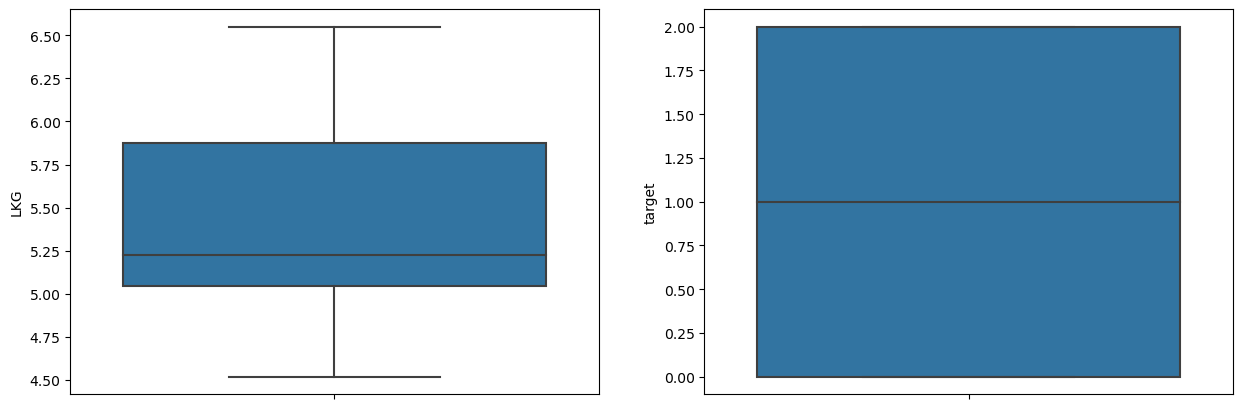

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="LKG")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="target")

plt.show()

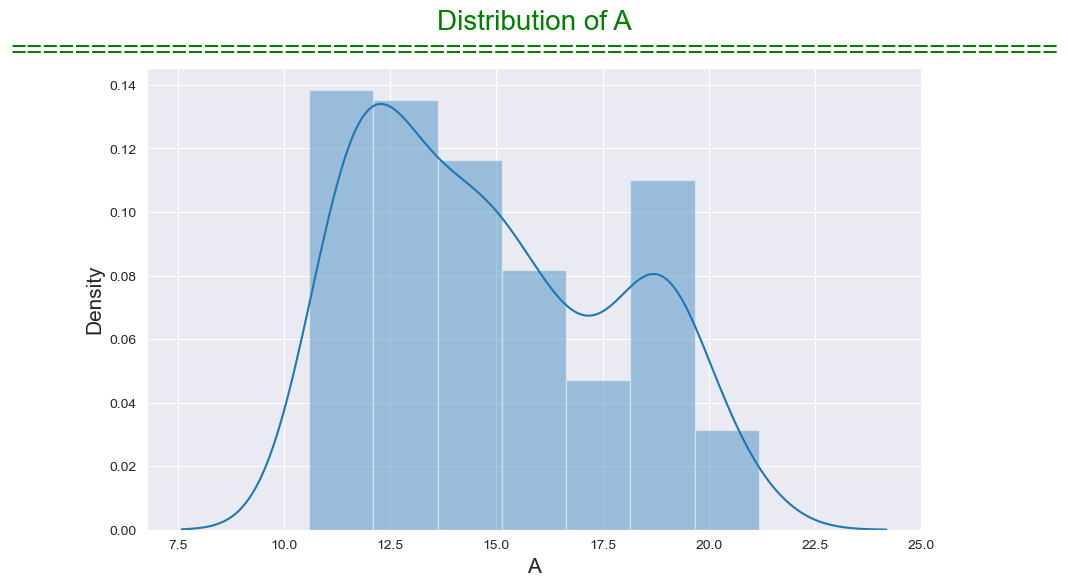

In [17]:

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["A"])
plt.title("Distribution of A\n=================================================================", fontsize=20, color="green")
plt.xlabel("A",fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

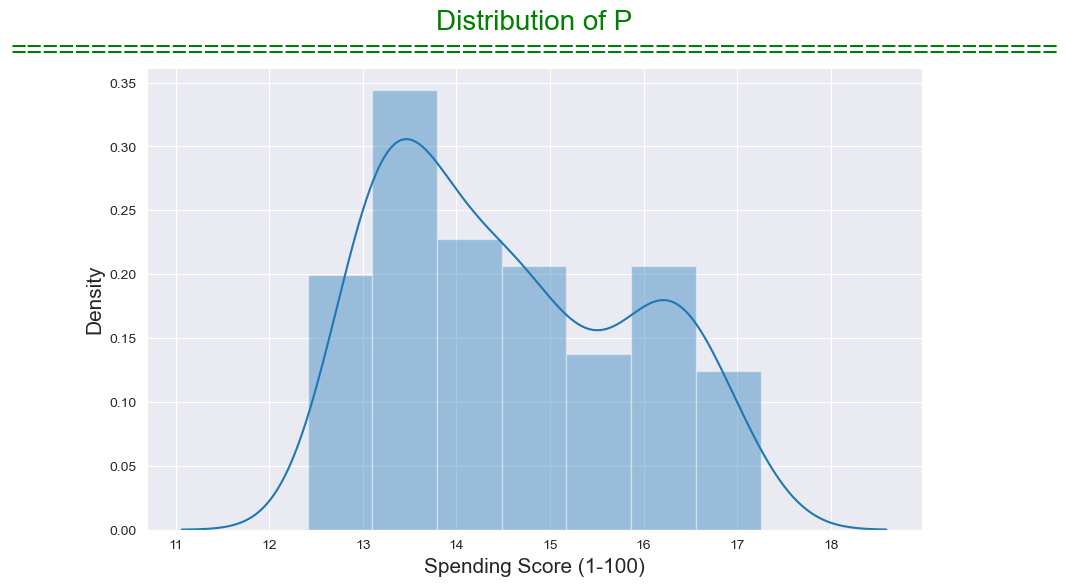

In [19]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["P"])
plt.title("Distribution of P\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

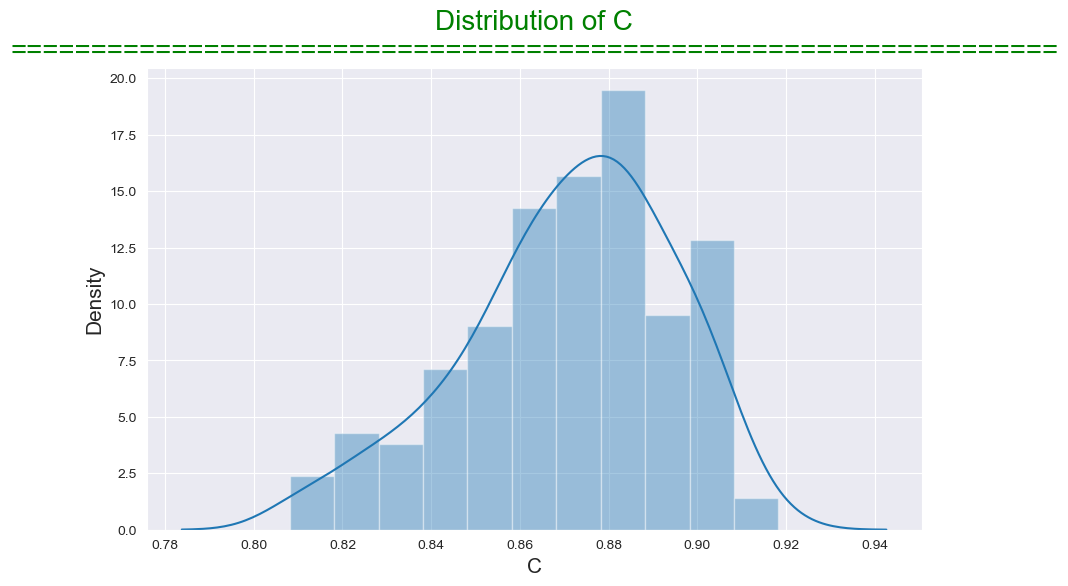

In [20]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["C"])
plt.title("Distribution of C\n=================================================================", fontsize=20, color="green")
plt.xlabel("C", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

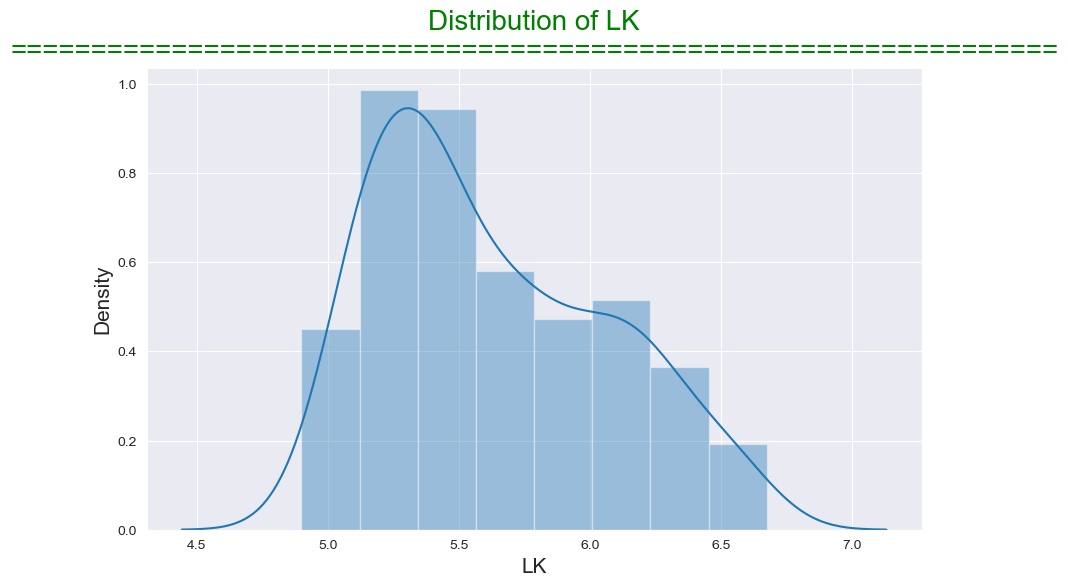

In [22]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["LK"])
plt.title("Distribution of LK\n=================================================================", fontsize=20, color="green")
plt.xlabel("LK", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

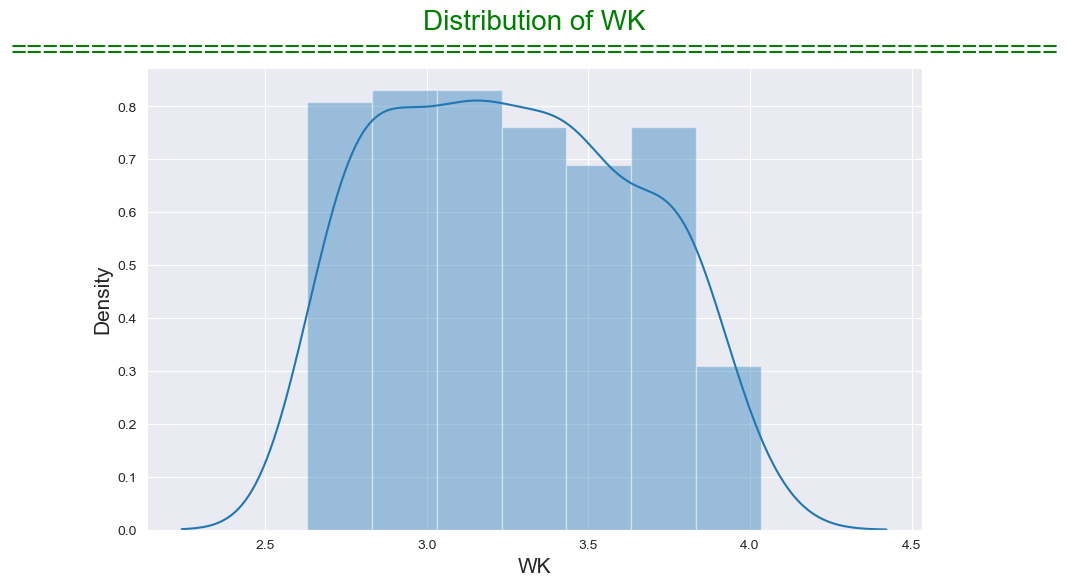

In [23]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["WK"])
plt.title("Distribution of WK\n=================================================================", fontsize=20, color="green")
plt.xlabel("WK", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

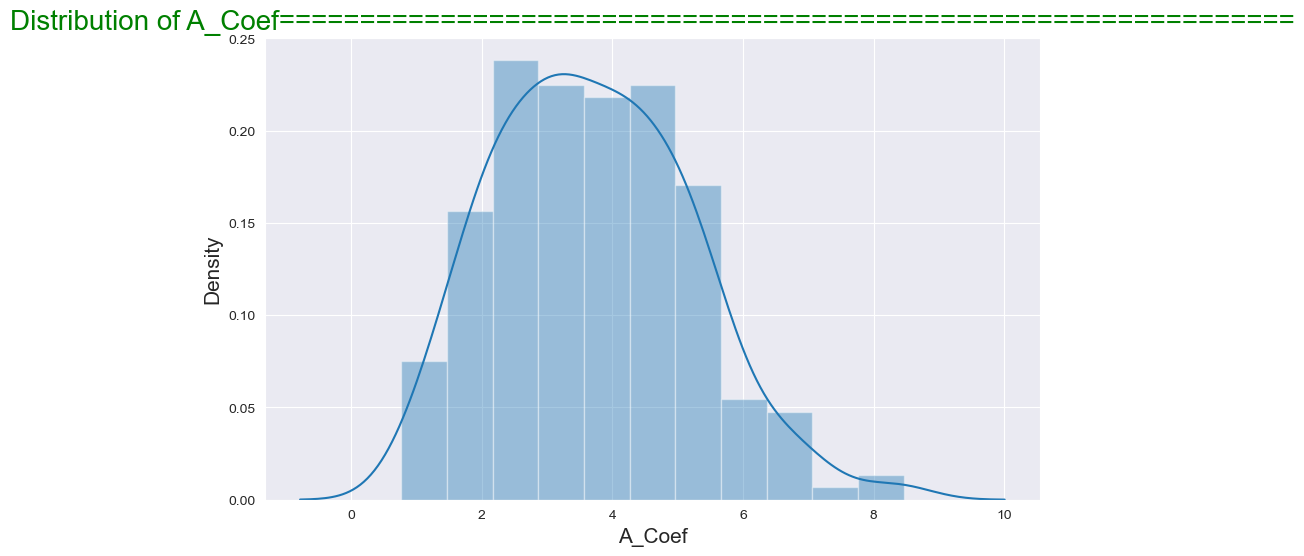

In [26]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["A_Coef"])
plt.title("Distribution of A_Coef===============================================================", fontsize=20, color="green")
plt.xlabel("A_Coef", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

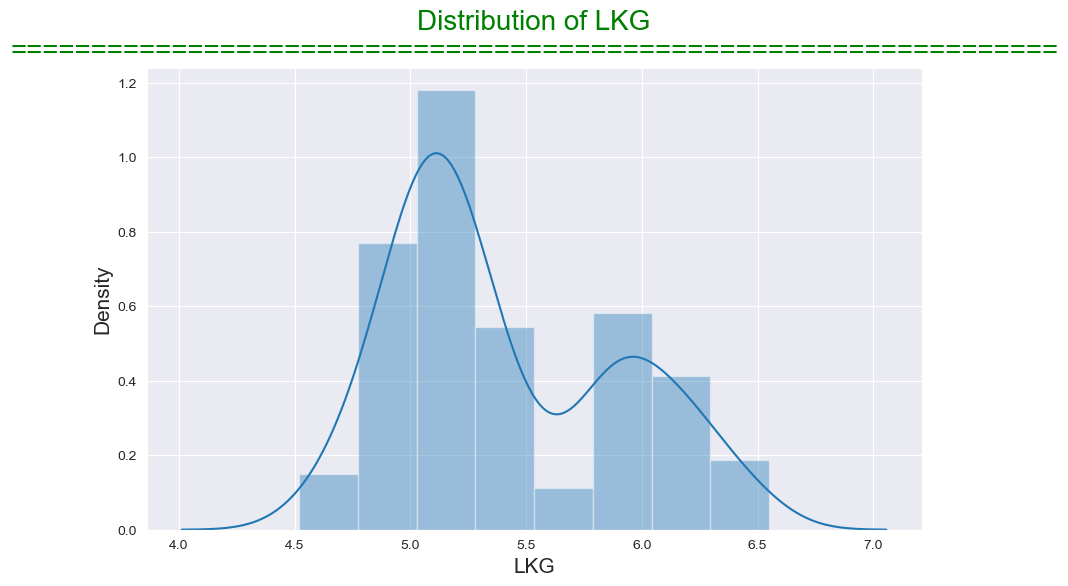

In [27]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["LKG"])
plt.title("Distribution of LKG\n=================================================================", fontsize=20, color="green")
plt.xlabel("LKG", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

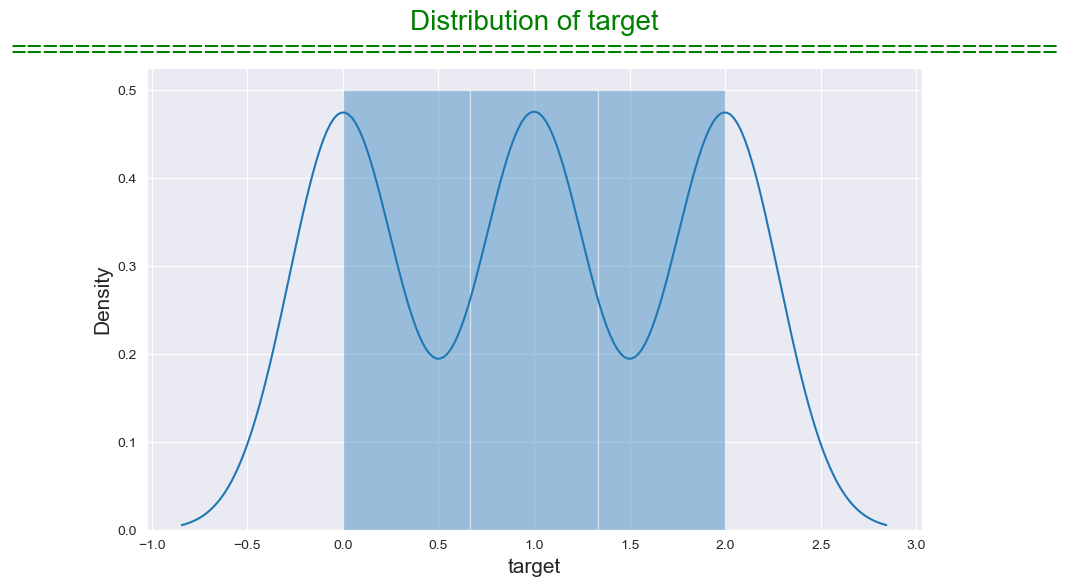

In [29]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["target"])
plt.title("Distribution of target\n=================================================================", fontsize=20, color="green")
plt.xlabel("target", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [31]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.4719337319126887


In [32]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.8952380952380953


In [33]:
!pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB 325.1 kB/s eta 0:00:08
      --------------------------------------- 0.1/2.6 MB 409.6 kB/s eta 0:00:07
     - -------------------------------------- 0.1/2.6 MB 476.3 kB/s eta 0:00:06
     - -------------------------------------- 0.1/2.6 MB 504.4 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/2.6 MB 615.9 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.6 MB 687.0 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 710.0 kB/s eta 0:00:04
     ----- ---------------------------------- 0.4/2.6 MB 794.9 kB/s eta 0:00:03
     ----- ---------------------------------- 0.4/2.6 MB 764.2 kB/s eta 0:00:03
     ------ --------------------------------- 0.5/2.6 MB 827.7 kB/s eta 0:00:03
     --------- ------------------------------ 0.6/2.6 MB 1

In [35]:
initial_medoids = [1, 50, 170]
kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
cluster_labels = np.zeros([210], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
kmedoids_instance.get_medoids()

[118, 48, 162]

In [37]:
kmedoids_instance.get_medoids()

[118, 48, 162]

In [38]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.4719337319126887


In [39]:
purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.8952380952380953


In [45]:
df_scaled = df[["A","P","C","LK","WK","A_Coef","LKG","target"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [46]:
df_scaled_fit

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
        -9.86151745e-01, -3.83577423e-01, -1.22474487e+00],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
        -1.78816620e+00, -9.22013487e-01, -1.22474487e+00],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
        -6.67479334e-01, -1.18919199e+00, -1.22474487e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
         3.07658816e+00, -7.18060432e-01,  1.22474487e+00],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -6.81351965e-02, -7.42534799e-01,  1.22474487e+00],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
         1.29122264e+00, -7.03783718e-01,  1.22474487e+00]])

In [47]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["A","P","C","LK","WK","A_Coef","LKG","target"]
df_scaled_fit.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,-1.224745
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,-1.224745
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,-1.224745
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,-1.224745
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,-1.224745


In [48]:
var_list = df_scaled_fit[["LKG","target"]]

In [49]:
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=6)

In [50]:
kmeans.labels_

array([3, 0, 0, 0, 3, 0, 3, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 1, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 1,
       5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5, 5, 1, 1, 5, 1, 1, 1, 5, 1,
       1, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
kmeans = KMeans(n_clusters=7, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=7)

In [52]:
df["Label"] = kmeans.labels_

In [53]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,3
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,3
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,5
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,5
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,3


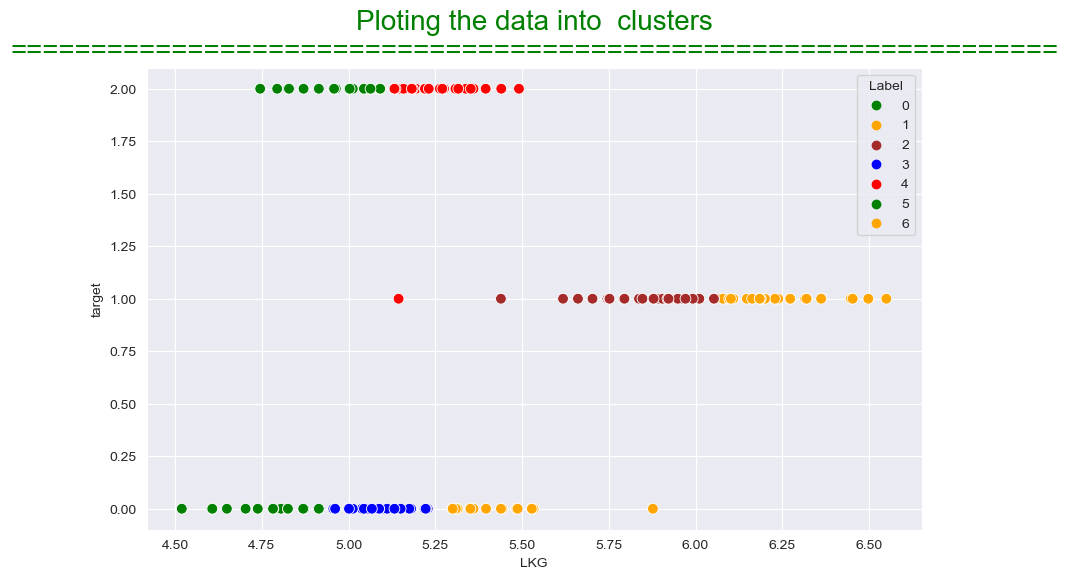

In [55]:
plt.figure(figsize=(10,6))

plt.title("Ploting the data into  clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="LKG", y="target", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

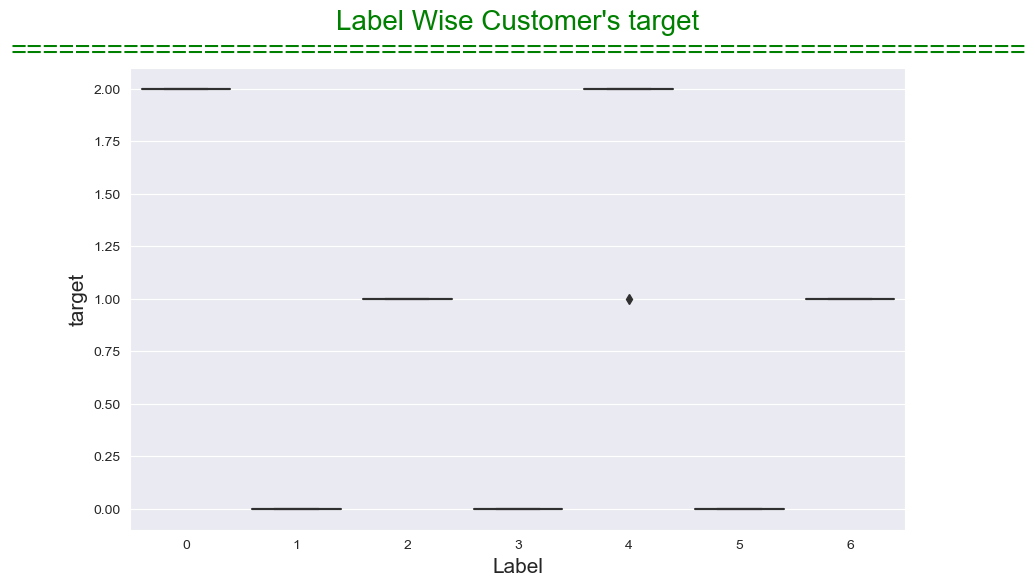

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='target', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Customer's target\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="target",fontsize=15)
plt.show()